1). LOADING OUR LIBRARIES

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

2). LOADING OUR DATASET

Our dataset is from Kenya Open data,Its a dataset showing Quarterly GDP in Kenya since 2001 to 2011.

In [0]:
#load csv file
data=pd.read_csv('GDP.csv')

3).PREVIEWING OUR DATA

In [4]:
#LETS SEE MORE ABOUT OUR DATA
data

,Year_and_Quarter,Sector,Kshs_Million,OBJECTID
0,2000 Q1,Agriculture and Forestry,63498,0
1,2000 Q2,Agriculture and Forestry,54167,1
2,2000 Q3,Agriculture and Forestry,64038,2
3,2000 Q4,Agriculture and Forestry,69469,3
4,2001 Q1,Agriculture and Forestry,67652,4
...,...,...,...,...
915,2010 Q2,"Real estate, renting, business services",22592,915
916,2010 Q3,"Real estate, renting, business services",18896,916
917,2010 Q4,"Real estate, renting, business services",16948,917
918,2011 Q1,"Real estate, renting, business services",20409,918


In [5]:
# data structure of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year_and_Quarter  920 non-null    object
 1   Sector            920 non-null    object
 2   Kshs_Million      920 non-null    int64 
 3   OBJECTID          920 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 28.9+ KB


In [6]:
#data description.
data.describe()

,Kshs_Million,OBJECTID
count,920.00000,920.000000
mean,68082.32500,459.500000
std,103383.78588,265.725422
min,-3500.00000,0.000000
25%,7821.00000,229.750000
50%,19108.50000,459.500000
75%,54170.00000,689.250000
max,385602.00000,919.000000


4). DATA CLEANING

VALIDITY.

In [7]:
#DROP THE OBJECTID COLUMN
data=data.drop(['OBJECTID'],axis=1)
data.head()

,Year_and_Quarter,Sector,Kshs_Million
0,2000 Q1,Agriculture and Forestry,63498
1,2000 Q2,Agriculture and Forestry,54167
2,2000 Q3,Agriculture and Forestry,64038
3,2000 Q4,Agriculture and Forestry,69469
4,2001 Q1,Agriculture and Forestry,67652


In [8]:
#spliting the year and quarter
data[['year','quarter']]=data.Year_and_Quarter.str.split(" ",expand=True)
data.head()

,Year_and_Quarter,Sector,Kshs_Million,year,quarter
0,2000 Q1,Agriculture and Forestry,63498,2000,Q1
1,2000 Q2,Agriculture and Forestry,54167,2000,Q2
2,2000 Q3,Agriculture and Forestry,64038,2000,Q3
3,2000 Q4,Agriculture and Forestry,69469,2000,Q4
4,2001 Q1,Agriculture and Forestry,67652,2001,Q1


In [0]:
#drop the original column
data=data.drop(['Year_and_Quarter'],axis=1)

In [10]:
#converting year into int
data['year'].astype(int)

0      2000
1      2000
2      2000
3      2000
4      2001
       ... 
915    2010
916    2010
917    2010
918    2011
919    2011
Name: year, Length: 920, dtype: int64

In [11]:
#deleting the TOTal GDP rows
gdp=data.sort_values(by='Kshs_Million',ascending=0)
data=gdp.iloc[184:]
data

,Sector,Kshs_Million,year,quarter
27,Agriculture and Forestry,89772,2006,Q4
31,Agriculture and Forestry,89742,2007,Q4
43,Agriculture and Forestry,89508,2010,Q4
26,Agriculture and Forestry,85982,2006,Q3
30,Agriculture and Forestry,85878,2007,Q3
...,...,...,...,...
554,FISIM,-3122,2000,Q3
581,FISIM,-3124,2007,Q2
552,FISIM,-3152,2000,Q1
590,FISIM,-3296,2009,Q3


COMPLETENESS

In [12]:
#LOOKING FOR NULL VALUES
data.isnull().sum()
#no null values found

Sector          0
Kshs_Million    0
year            0
quarter         0
dtype: int64

CONSISTENCY

In [0]:
#LOOKING FOR DUPLICATES IN OUR DATA
data.duplicated()
#no duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
915    False
916    False
917    False
918    False
919    False
Length: 920, dtype: bool

DATA ANALYSIS


1). The sector with the highest GDP for the 10 years

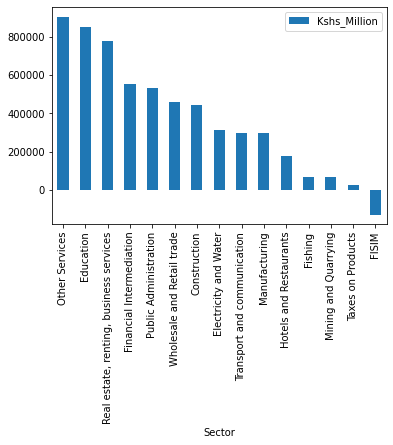

In [0]:
#sector by GDP
sec.plot(kind='bar')

Which year had the highest GDP


,Sector,Kshs_Million,year,quarter
27,Agriculture and Forestry,89772,2006,Q4
31,Agriculture and Forestry,89742,2007,Q4
43,Agriculture and Forestry,89508,2010,Q4
26,Agriculture and Forestry,85982,2006,Q3
30,Agriculture and Forestry,85878,2007,Q3
...,...,...,...,...
554,FISIM,-3122,2000,Q3
581,FISIM,-3124,2007,Q2
552,FISIM,-3152,2000,Q1
590,FISIM,-3296,2009,Q3


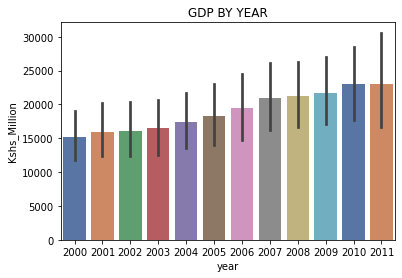

In [13]:
#gdp by year
year_gdp=data.sort_values(by='Kshs_Million',ascending=0)
year_gdp
sns.barplot(x='year',y='Kshs_Million',data=year_gdp,palette='deep').set_title('GDP BY YEAR')
year_gdp

4).overview of  GDP PER YEARS


Lets see by year which sector in the goverment contributed most.

In [0]:
#2000
data_2000=data[data['year']=='2000']
#2001
data_2001=data[data['year']=='2001']
#2002
data_2002=data[data['year']=='2002']
#2003
data_2003=data[data['year']=='2003'].sort_values(by='Kshs_Million',ascending=0)
#2004
data_2004=data[data['year']=='2004']
#2005
data_2005=data[data['year']=='2005']
#2006
data_2006=data[data['year']=='2006']
#2007
data_2007=data[data['year']=='2007']
#2008
data_2008=data[data['year']=='2008']
#2009
data_2009=data[data['year']=='2009']
#2010
data_2010=data[data['year']=='2010']
#2011
data_2011=data[data['year']=='2011']

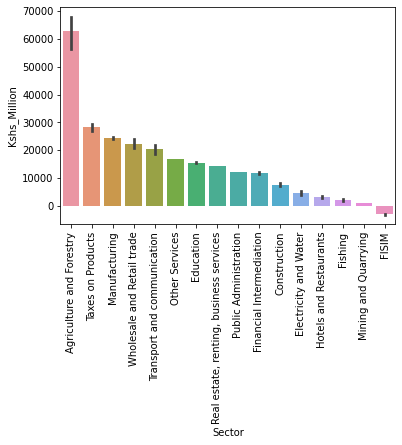

In [24]:
#visualize GDP BY sECTOR EACH YEAR
#2000
plt=sns.barplot(x='Sector',y='Kshs_Million',data=data_2000)
for item in plt.get_xticklabels():
    item.set_rotation(90)


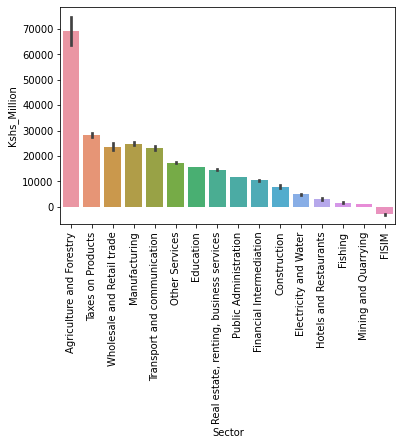

In [21]:
#2001
plt2=sns.barplot(x='Sector',y='Kshs_Million',data=data_2001)
for it in plt2.get_xticklabels():
    it.set_rotation(90)

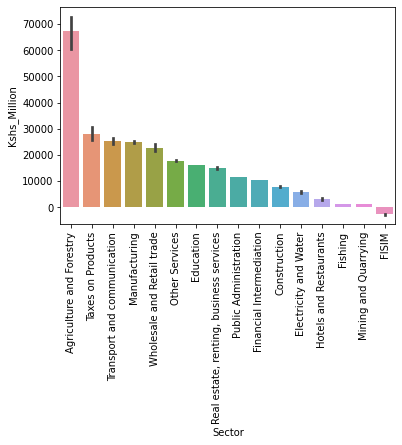

In [29]:
#2002
chart=sns.barplot(x='Sector',y='Kshs_Million',data=data_2002)
for x in chart.get_xticklabels():
  x.set_rotation(90)

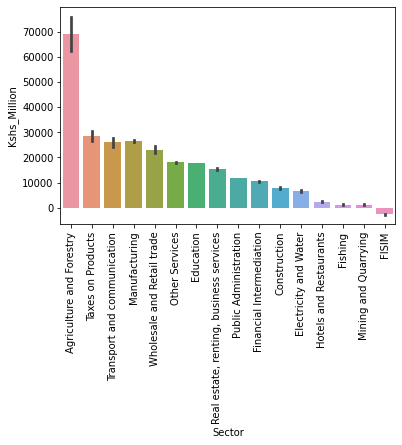

In [36]:
#2003
data_2003
y=sns.barplot(x="Sector",y='Kshs_Million',data=data_2003)
for p in y.get_xticklabels():
  p.set_rotation(90)

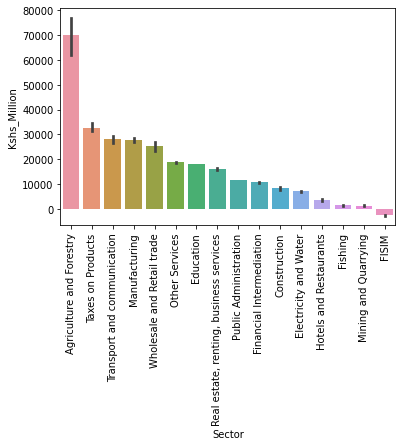

In [37]:
#2004
four=sns.barplot(x='Sector',y='Kshs_Million',data=data_2004)
for v in four.get_xticklabels():
  v.set_rotation(90)

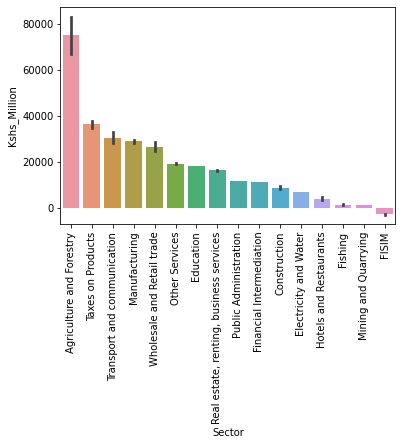

In [38]:
#2005
five=sns.barplot(x='Sector',y='Kshs_Million',data=data_2005)
for f in five.get_xticklabels():
  f.set_rotation(90)

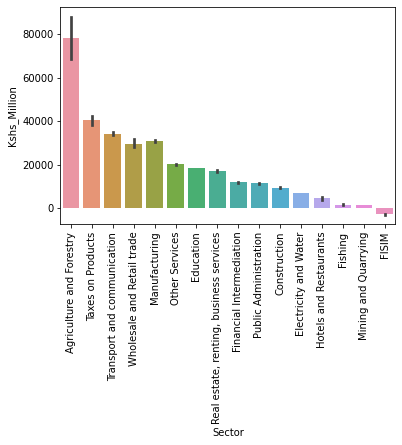

In [39]:
#2006
six=sns.barplot(x='Sector',y='Kshs_Million',data=data_2006)
for s in six.get_xticklabels():
  s.set_rotation(90)

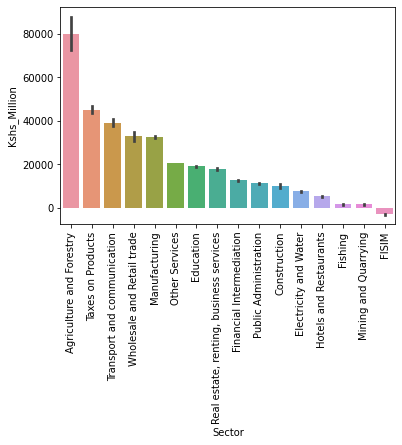

In [40]:
#2007
seven=sns.barplot(x='Sector',y='Kshs_Million',data=data_2007)
for n in seven.get_xticklabels():
  n.set_rotation(90)

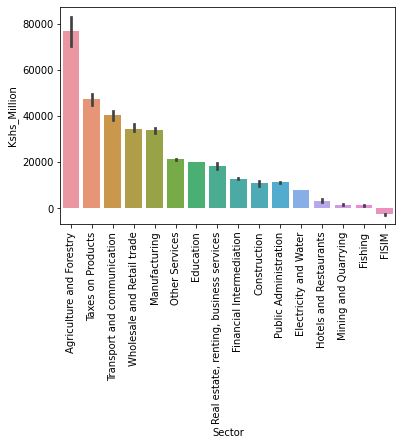

In [41]:
#2008
eight=sns.barplot(x='Sector',y='Kshs_Million',data=data_2008)
for e in eight.get_xticklabels():
  e.set_rotation(90)

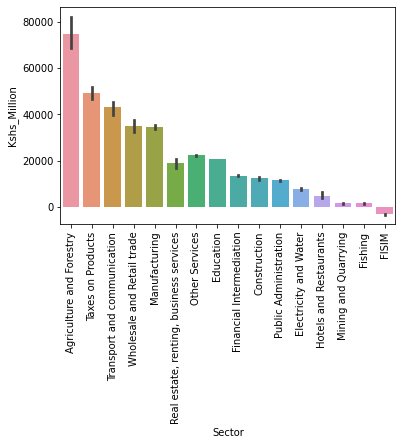

In [42]:
#2009
nine=sns.barplot(x='Sector',y='Kshs_Million',data=data_2009)
for n in nine.get_xticklabels():
  n.set_rotation(90)

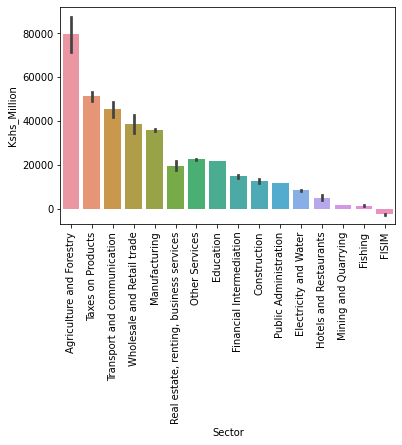

In [43]:
#2010
ten=sns.barplot(x='Sector',y='Kshs_Million',data=data_2010)
for t in ten.get_xticklabels():
  t.set_rotation(90)

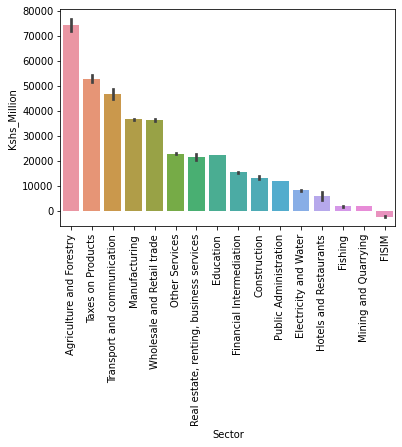

In [44]:
#2011
eleven=sns.barplot(x='Sector',y='Kshs_Million',data=data_2011)
for l in eleven.get_xticklabels():
  l.set_rotation(90)